In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re

In [36]:
#load data into the dataframe

df = pd.read_csv("Horror Movies IMDb.csv")
df.head()

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,"9,05,275",$78.90M
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,"6,89,068",$32.00M
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",$44.02M
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,"4,39,793",$13.78M
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,"53,297",NaN


In [37]:
#check for null values
df.isnull().sum()

Movie Title      0
Movie Year       0
Runtime          0
Genre            0
Rating           0
Director         0
Votes            0
Gross          199
dtype: int64

<Axes: >

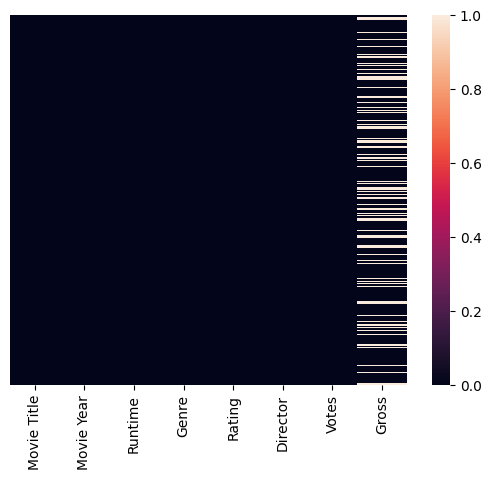

In [38]:
sns.heatmap(df.isnull(),yticklabels=False)

#### Only the Gross values has the null values we will replace it with zero

In [39]:
df['Gross'] = df['Gross'].fillna(0)
df['Gross'].head()

0    $78.90M
1    $32.00M
2    $44.02M
3    $13.78M
4          0
Name: Gross, dtype: object

In [40]:
#keep only numerical values and remove other values using regular expression for df['Gross] column

def keep_number(text):
    pattern = r'\D+'
    return re.sub(pattern,'',str(text))

df['Gross_num'] = df['Gross'].apply(keep_number).astype('int64')
df['Gross_num']

0      7890
1      3200
2      4402
3      1378
4         0
       ... 
831       0
832       0
833     518
834    1025
835       0
Name: Gross_num, Length: 836, dtype: int64

In [58]:
df['Rating'] = df['Rating'].apply(keep_number).astype('int64')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Title  836 non-null    object 
 1   Movie Year   836 non-null    int64  
 2   Runtime      836 non-null    int64  
 3   Genre        836 non-null    object 
 4   Rating       836 non-null    float64
 5   Director     836 non-null    object 
 6   Votes        836 non-null    object 
 7   Gross        836 non-null    object 
 8   Gross_num    836 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 58.9+ KB


In [42]:
df['Movie Year'] = pd.to_datetime(df['Movie Year'],format='%Y')
df['Movie Year']

0     1979-01-01
1     1960-01-01
2     1980-01-01
3     1982-01-01
4     2018-01-01
         ...    
831   1990-01-01
832   2020-01-01
833   2005-01-01
834   2003-01-01
835   1966-01-01
Name: Movie Year, Length: 836, dtype: datetime64[ns]

In [43]:
df['Movie Year'] = df['Movie Year'].dt.year

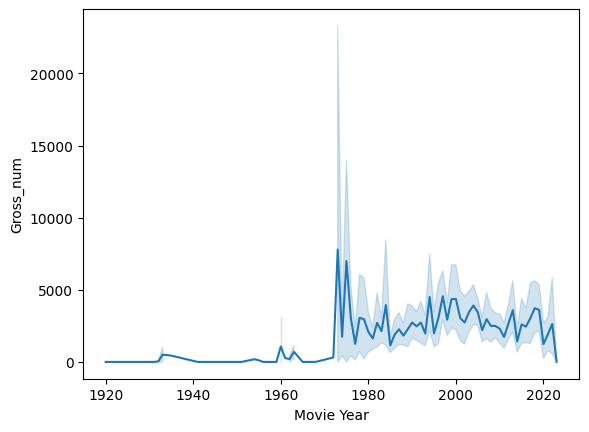

In [45]:
sns.lineplot(data=df,x='Movie Year',y='Gross_num')
plt.show()

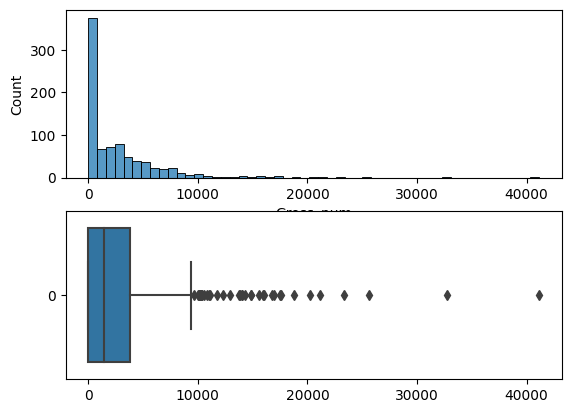

In [57]:
fig, ax = plt.subplots(2)

sns.histplot(df['Gross_num'],ax=ax[0])
sns.boxplot(df['Gross_num'],ax=ax[1],orient='h')

plt.show()

<Axes: >

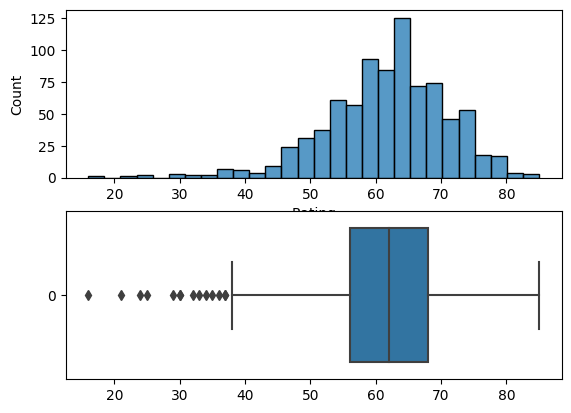

In [60]:
fig, ax = plt.subplots(2)

sns.histplot(df['Rating'],ax=ax[0])
sns.boxplot(df['Rating'],ax=ax[1],orient='h')

In [67]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()

scaler.fit(df[['Gross_num']])

df['Gross_scale'] = scaler.transform(df[['Gross_num']])

In [68]:
def plot_hist_box(data):
    fig, ax = plt.subplots(2)

    sns.histplot(data,ax=ax[0])
    sns.boxplot(data,ax=ax[1],orient='h')

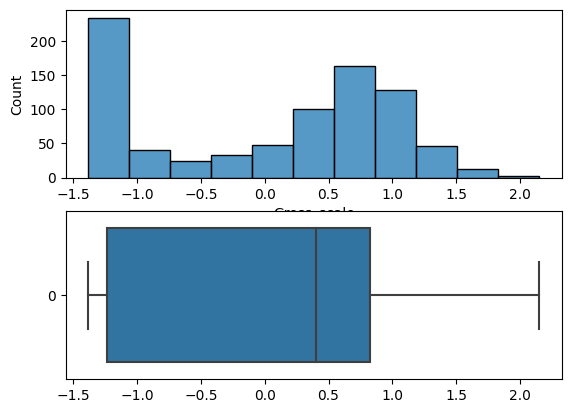

In [69]:
plot_hist_box(df['Gross_scale'])

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df[['Rating']])

df['Rating_scale'] = scaler.transform(df[['Rating']])

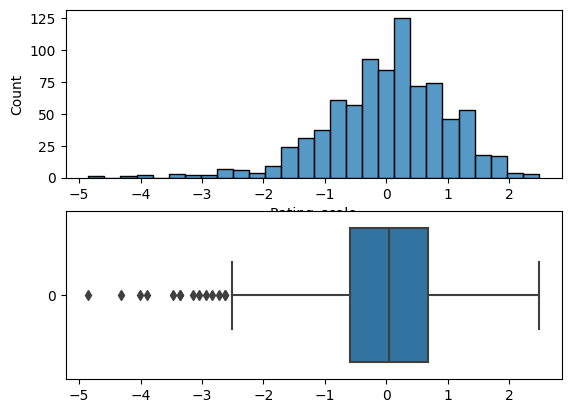

In [71]:
plot_hist_box(df['Rating_scale'])

In [72]:
df.head()

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross_num,Gross_scale,Rating_scale
0,Alien,1979,117,"Horror, Sci-Fi",85,Ridley Scott,"9,05,275",$78.90M,7890,1.185160,2.489733
1,Psycho,1960,109,"Horror, Mystery, Thriller",85,Alfred Hitchcock,"6,89,068",$32.00M,3200,0.749100,2.489733
2,The Shining,1980,146,"Drama, Horror",84,Stanley Kubrick,"10,51,582",$44.02M,4402,0.896604,2.383327
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",82,John Carpenter,"4,39,793",$13.78M,1378,0.391266,2.170514
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",82,Rahi Anil Barve,"53,297",0,0,-1.383105,2.170514


In [73]:
df['Votes'] = df['Votes'].apply(keep_number).astype("int64")

In [76]:
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer()
power.fit(df[['Votes']])

df['Votes_scale'] = power.transform(df[['Votes']])

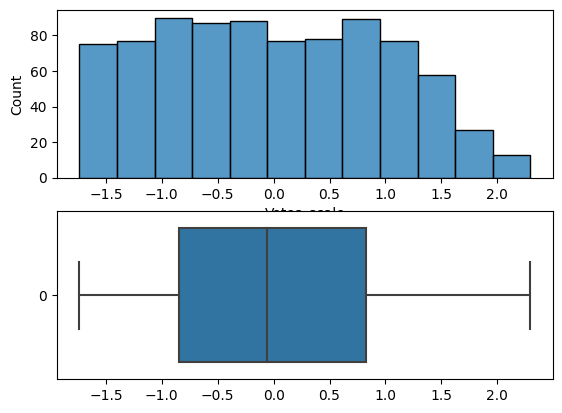

In [77]:
plot_hist_box(df['Votes_scale'])

In [78]:
df.columns

Index(['Movie Title', 'Movie Year', 'Runtime', 'Genre', 'Rating', 'Director',
       'Votes', 'Gross', 'Gross_num', 'Gross_scale', 'Rating_scale',
       'Votes_scale'],
      dtype='object')

In [80]:
sample = df[["Movie Year","Runtime","Gross_scale","Rating_scale","Votes_scale"]]

In [81]:
sample.head()

,Movie Year,Runtime,Gross_scale,Rating_scale,Votes_scale
0,1979,117,1.185160,2.489733,2.236269
1,1960,109,0.749100,2.489733,2.116112
2,1980,146,0.896604,2.383327,2.295798
3,1982,109,0.391266,2.170514,1.880441
4,2018,104,-1.383105,2.170514,-0.261007


In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

sample['Runtime_scale'] = scaler.fit_transform(sample[['Runtime']])

In [84]:
sample.head()

,Movie Year,Runtime,Gross_scale,Rating_scale,Votes_scale,Runtime_scale
0,1979,117,1.185160,2.489733,2.236269,1.121317
1,1960,109,0.749100,2.489733,2.116112,0.568674
2,1980,146,0.896604,2.383327,2.295798,3.124648
3,1982,109,0.391266,2.170514,1.880441,0.568674
4,2018,104,-1.383105,2.170514,-0.261007,0.223272


In [87]:
sample.drop("Runtime",axis=1,inplace=True)

In [89]:
sample = sample.set_index("Movie Year")

In [102]:
sample.sort_index(ascending=True,inplace=True)

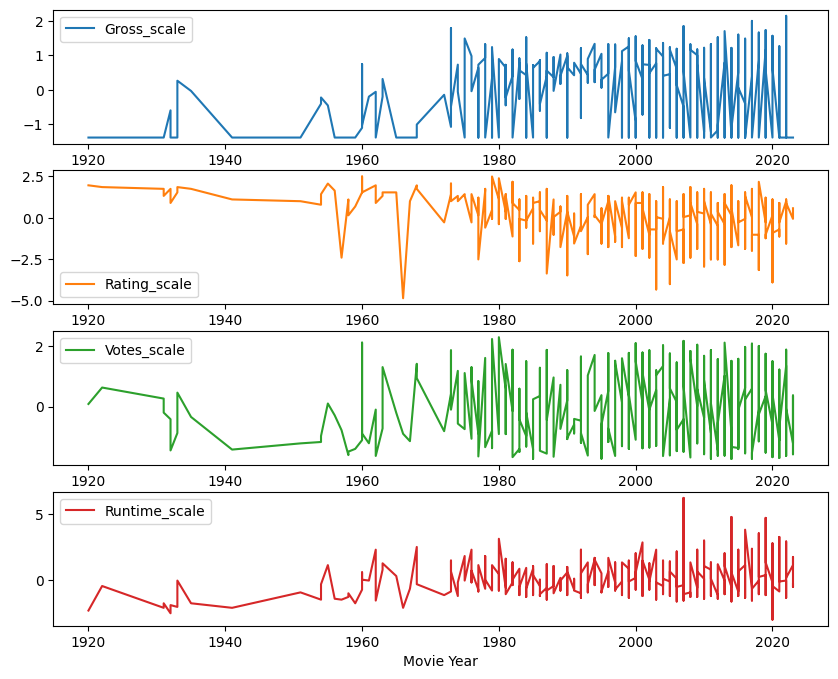

In [105]:
sample.plot(subplots=True,sharex=False,sharey=False,figsize=(10,8))
plt.show()

In [95]:
sample.head()

,Gross_scale,Rating_scale,Votes_scale,Runtime_scale
Movie Year,,,,
1979,1.185160,2.489733,2.236269,1.121317
1960,0.749100,2.489733,2.116112,0.568674
1980,0.896604,2.383327,2.295798,3.124648
1982,0.391266,2.170514,1.880441,0.568674
2018,-1.383105,2.170514,-0.261007,0.223272


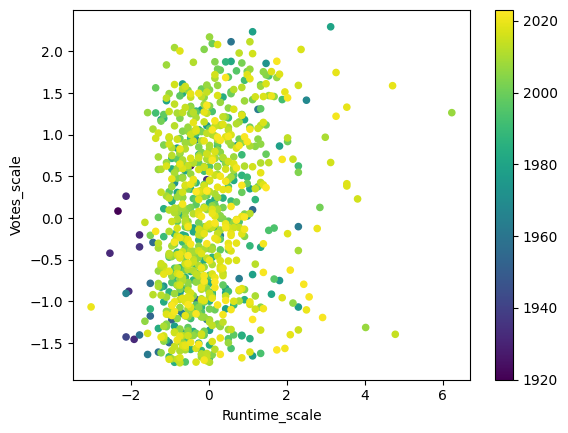

In [110]:
# Scatterplot with one company per axis
sample.plot.scatter('Runtime_scale', 'Votes_scale',c=sample.index, 
                    cmap=plt.cm.viridis, colorbar=True)
plt.show()

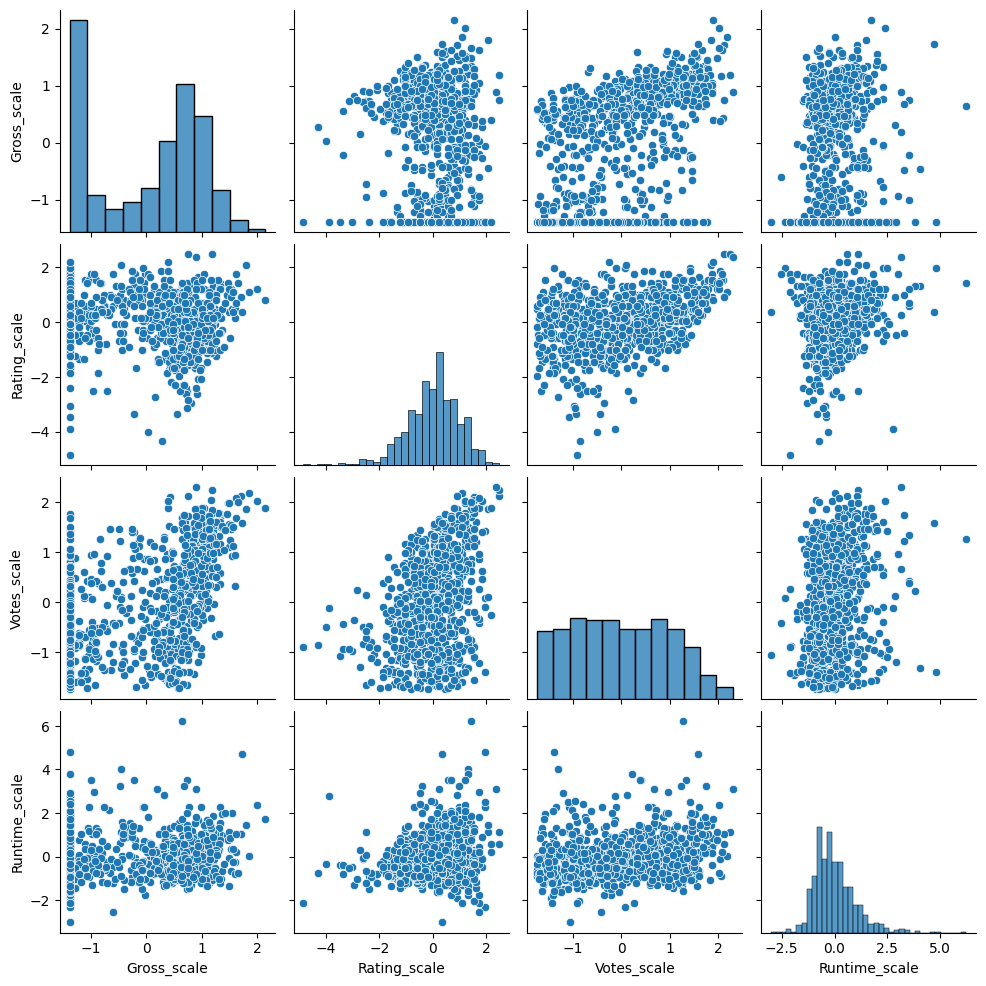

In [107]:
sns.pairplot(sample)

In [111]:
sample.head()

,Gross_scale,Rating_scale,Votes_scale,Runtime_scale
Movie Year,,,,
1920,-1.383105,1.957701,0.084127,-2.332702
1922,-1.383105,1.851294,0.628363,-0.467532
1931,-1.383105,1.744888,0.262786,-2.125461
1931,-1.383105,1.319262,-0.202173,-1.780059
1932,-0.594181,1.744888,-0.421343,-2.539943


In [112]:
X = sample[["Runtime_scale","Votes_scale","Rating_scale"]]
y = sample[["Gross_scale"]]

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.8, shuffle=False)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = mean_squared_error(y_test, predictions)
print(score)

1.2310014691078373
